In [1]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.005, QasmQobjInstructions = [[{'name': 'x', 'qubits': [0]}]
  P(1) = 0.995, QasmQobjInstructions = [[{'name': 'id', 'qubits': [0]}]
NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx', 'x']
  Instructions with noise: ['x']
  All-qubits errors: ['x']
['cx', 'id', 'rz', 'sx', 'x']
     ┌───┐┌───┐┌───┐┌───┐┌───┐┌─┐
q_0: ┤ H ├┤ I ├┤ X ├┤ I ├┤ H ├┤M├
     └───┘└───┘└───┘└───┘└───┘└╥┘
c: 1/══════════════════════════╩═
                               0 


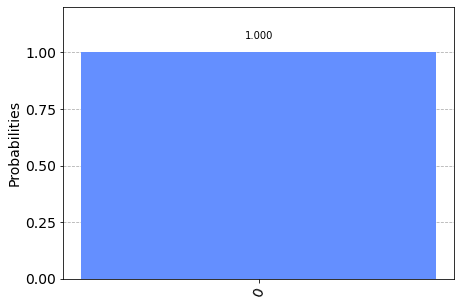

In [33]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Kraus, SuperOp
from qiskit.providers.aer import AerSimulator
from qiskit.tools.visualization import plot_histogram
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram
import qiskit.providers.aer.noise as noise

# Import from Qiskit Aer noise module
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise import QuantumError, ReadoutError
from qiskit.providers.aer.noise import pauli_error
from qiskit.providers.aer.noise import depolarizing_error
from qiskit.providers.aer.noise import thermal_relaxation_error

#p_error = 0.05
#bit_flip = pauli_error([('X', p_error), ('I', 1 - p_error)])
#print(bit_flip)

# Error probabilities
prob_1 = 0.005  # 1-qubit gate
prob_2 = 0.05   # 2-qubit gate

# Depolarizing quantum errors
error_1 = noise.pauli_error([('X', prob_1), ('I', 1 - prob_1)])
error_2 = noise.pauli_error([('X', prob_2), ('I', 1 - prob_1)])
print(error_1)
print(error_2)

# Add errors to noise model
noise_model = noise.NoiseModel()
noise_model.add_all_qubit_quantum_error(error_1, ['x'])
#noise_model.add_all_qubit_quantum_error(error_2, ['x'])
print(noise_model)
# Get basis gates from noise model
basis_gates = noise_model.basis_gates
print(basis_gates)
# Make a circuit
circ = QuantumCircuit(1, 1)
circ.h(0)
circ.i(0)
circ.x(0)
circ.i(0)
circ.h(0)

circ.measure([0], [0])
print(circ)
# Perform a noise simulation
result = execute(circ, Aer.get_backend('qasm_simulator'),
                 basis_gates=basis_gates,
                 noise_model=noise_model).result()
counts = result.get_counts(0)
plot_histogram(counts)

In [29]:
# Create an empty noise model
noise_model = NoiseModel()

# Add depolarizing error to all single qubit u1, u2, u3 gates on qubit 0 only
error = pauli_error([('X', 0.05), ('I', 1 - 0.05)]
noise_model.add_all_qubit_quantum_error(error, ['x'])

# Print noise model info
print(noise_model)



Traceback (most recent call last):
  File "/opt/conda/lib/python3.8/site-packages/IPython/core/compilerop.py", line 101, in ast_parse
    return compile(source, filename, symbol, self.flags | PyCF_ONLY_AST, 1)
  File "/tmp/ipykernel_60/1024819880.py", line 6
    noise_model.add_all_qubit_quantum_error(error, ['x'])
    ^
SyntaxError: invalid syntax

Use %tb to get the full traceback.


In [38]:
# Error probabilities
prob_1 = 0.05  # 1-qubit gate
#prob_2 = 0.0   # 2-qubit gate

# Depolarizing quantum errors
error_1 = noise.pauli_error([('X', prob_1), ('I', 1 - prob_1)])
#error_2 = noise.pauli_error([('X', prob_2), ('I', 1 - prob_1)])
print(error_1)
#print(error_2)

QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.05, QasmQobjInstructions = [[{'name': 'x', 'qubits': [0]}]
  P(1) = 0.95, QasmQobjInstructions = [[{'name': 'id', 'qubits': [0]}]
